In [136]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [137]:
df= pd.read_csv('stock1.csv')

In [138]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [139]:
df.shape

(1009, 7)

In [140]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [141]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [142]:
df.isna().sum().any()

False

In [143]:
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')

In [144]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [145]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [146]:
df.head()
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [147]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [148]:
df.set_index('Date',inplace=True)

In [149]:
data=pd.DataFrame(df,columns=['Close'])
data=data.reset_index()
data.head()

,Date,Close
0,2018-02-05,254.259995
1,2018-02-06,265.720001
2,2018-02-07,264.559998
3,2018-02-08,250.100006
4,2018-02-09,249.470001


In [150]:
import matplotlib.dates as md
import matplotlib.pyplot as plt

In [151]:
yr= md.YearLocator()
fmt=md.DateFormatter('%Y')

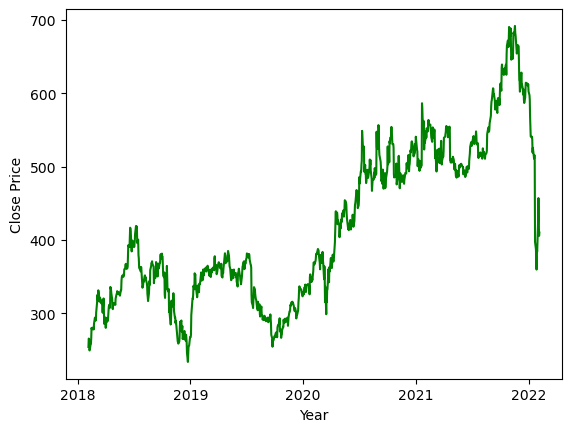

In [216]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(data['Date'], data['Close'],color='g')
ax.xaxis.set_major_locator(yr)
ax.xaxis.set_major_formatter(fmt)
ax.set_xlabel('Year')
ax.set_ylabel('Close Price')
plt.show()

In [218]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
train, test = train_test_split(data, test_size=0.10)

In [220]:
X_train=np.array(train.index).reshape(-1,1)
y_train=train['Close']
y_train

992    537.219971
517    379.239990
257    351.769989
434    276.820007
725    528.909973
          ...    
556    421.420013
636    482.679993
494    349.600006
312    385.029999
865    547.950012
Name: Close, Length: 908, dtype: float64

In [221]:
X_train.ndim

2

In [222]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [223]:
model.intercept_

260.7601588917802

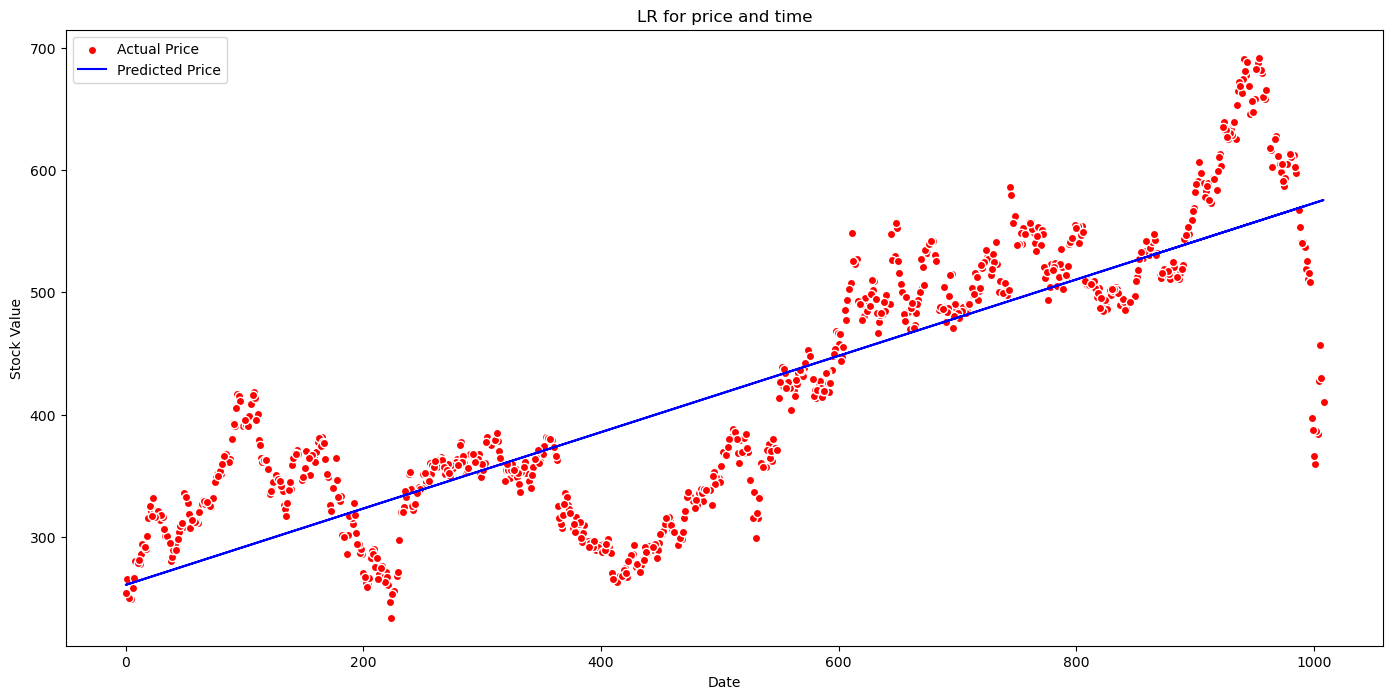

In [224]:
plt.figure(1, figsize=(17,8))
plt.title('LR for price and time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price',color='r')
plt.plot(X_train, model.predict(X_train), color='Blue', label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Stock Value')
plt.legend()
plt.show()

In [226]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']
y_predict = model.predict(X_test)
y_predict

array([342.21553533, 291.03284669, 262.32060672, 355.94747618,
       486.40091431, 300.39553363, 567.23211162, 497.32404908,
       575.03435074, 473.91733171, 372.48822312, 440.83583784,
       405.25762744, 560.99032032, 409.31479178, 482.65583953,
       271.99538323, 432.09733002, 428.35225524, 292.59329451,
       525.10002036, 369.9915066 , 493.5789743 , 565.98375336,
       317.87254927, 390.58941789, 351.57822228, 439.58747958,
       318.4967284 , 334.72538577, 497.63613865, 384.03553702,
       568.48046988, 271.3712041 , 546.0100212 , 428.6643448 ,
       261.38433802, 315.37583275, 395.27076136, 301.01971276,
       494.515243  , 557.86942467, 398.39165701, 481.09539171,
       291.34493625, 461.12165955, 507.31091516, 422.42255351,
       495.13942213, 309.44613102, 314.12747449, 462.37001781,
       560.67823076, 514.80106472, 315.68792231, 339.09463968,
       356.25956575, 472.04479433, 543.51330469, 509.49554211,
       503.25375081, 489.83389952, 319.74508666, 293.84

In [228]:
data['Prediction'] = model.predict(np.array(data.index).reshape(-1, 1))
data

,Date,Close,Prediction
0,2018-02-05,254.259995,260.760159
1,2018-02-06,265.720001,261.072248
2,2018-02-07,264.559998,261.384338
3,2018-02-08,250.100006,261.696428
4,2018-02-09,249.470001,262.008517
...,...,...,...
1004,2022-01-31,427.140015,574.098082
1005,2022-02-01,457.130005,574.410172
1006,2022-02-02,429.480011,574.722261
1007,2022-02-03,405.600006,575.034351


In [ ]:
from sklearn import metrics

In [229]:
data['Close'].describe()

count    1009.000000
mean      419.000733
std       108.289999
min       233.880005
25%       331.619995
50%       378.670013
75%       509.079987
max       691.690002
Name: Close, dtype: float64

In [230]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 46.41724063935562
Mean Squared Error: 3527.933273130968
Root Mean Squared Error: 59.39640791437617


In [231]:
print('R square: ', metrics.r2_score(y_test, y_pred))

R square:  0.7213212216013408
